In [1]:
import pandas_datareader.data as web
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# read data
c = ['GDPC1', 'M1SL', 'FEDFUNDS', 'CPILFESL']
orig_data = web.DataReader(c, 'fred',start = datetime.datetime(1959,7,1),end = datetime.datetime(1996,3,1))
data_mp = orig_data.copy()
data_mp

,GDPC1,M1SL,FEDFUNDS,CPILFESL
DATE,,,,
1959-07-01,3194.653,141.7,3.47,30.2
1959-08-01,NaN,141.9,3.50,30.2
1959-09-01,NaN,141.0,3.76,30.3
1959-10-01,3203.759,140.5,3.98,30.4
1959-11-01,NaN,140.4,4.00,30.4
...,...,...,...,...
1995-11-01,NaN,1134.1,5.80,163.0
1995-12-01,NaN,1127.5,5.60,163.1
1996-01-01,10817.896,1123.5,5.56,163.7


In [2]:
# plot data function
def plot_data(data_b, data_r, label, title, ylim=None):
    # plot
    if data_b is not None:
        plt.plot(data_b.index, data_b, label=label[0], color="blue")
    if data_r is not None:
        plt.plot(data_r.index, data_r, label=label[1], color="darkorange")

    # title
    plt.title(title)
    
    #lim
    if ylim is not None:
        plt.ylim(ylim[0], ylim[1])
    
    #setting
    plt.xticks(rotation=90, size='small')
    
    # display
    plt.legend()

    # show
    plt.show()

In [3]:
# convert the index
index = pd.date_range(data_mp.index[0], periods=data_mp.shape[0], freq="MS")
data_mp.set_index(index, inplace=True)
type(data_mp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
# (a) Moving average

data_mp["FEDFUNDS_ADJ"] = data_mp['FEDFUNDS'].rolling(window=12, min_periods=1, center=True).mean()
data_mp

,GDPC1,M1SL,FEDFUNDS,CPILFESL,FEDFUNDS_ADJ
1959-07-01,3194.653,141.7,3.47,30.2,3.783333
1959-08-01,NaN,141.9,3.50,30.2,3.812857
1959-09-01,NaN,141.0,3.76,30.3,3.832500
1959-10-01,3203.759,140.5,3.98,30.4,3.833333
1959-11-01,NaN,140.4,4.00,30.4,3.842000
...,...,...,...,...,...
1995-11-01,NaN,1134.1,5.80,163.0,5.695455
1995-12-01,NaN,1127.5,5.60,163.1,5.664000
1996-01-01,10817.896,1123.5,5.56,163.7,5.626667
1996-02-01,NaN,1118.5,5.22,164.0,5.598750


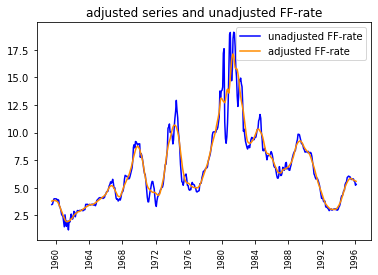

In [5]:
# plot adjusted series and unadjusted series
plot_data(data_mp['FEDFUNDS'], data_mp['FEDFUNDS_ADJ'], ['unadjusted FF-rate', 'adjusted FF-rate'], 'adjusted series and unadjusted FF-rate')

In [6]:
# (b)linear interporation

data_mp['GDPC1'].interpolate(method='linear',inplace=True)
data_mp['GDPC1']

1959-07-01     3194.653000
1959-08-01     3197.688333
1959-09-01     3200.723667
1959-10-01     3203.759000
1959-11-01     3227.758333
                  ...     
1995-11-01    10764.284000
1995-12-01    10791.090000
1996-01-01    10817.896000
1996-02-01    10817.896000
1996-03-01    10817.896000
Freq: MS, Name: GDPC1, Length: 441, dtype: float64

In [7]:
# (c)log transformation
data_mp['GDPC1'] = np.log(data_mp['GDPC1'])
data_mp['M1SL'] = np.log(data_mp['M1SL'])
data_mp['CPILFESL'] = np.log(data_mp['CPILFESL'])

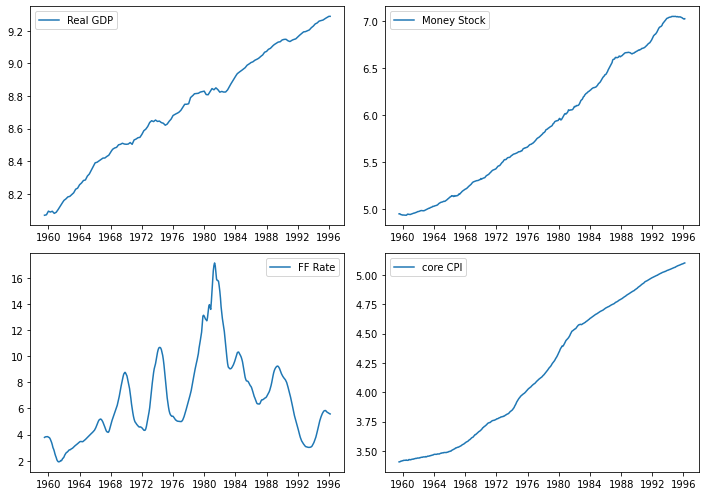

In [8]:
import itertools
# plot original series and seasonally ajusted series

fig, ax = plt.subplots(2, 2, figsize=(10,7))

ax[0, 0].plot(data_mp['GDPC1'].index, data_mp['GDPC1'], label='Real GDP')
ax[0, 1].plot(data_mp['M1SL'].index, data_mp['M1SL'], label='Money Stock')
ax[1, 0].plot(data_mp["FEDFUNDS_ADJ"].index, data_mp["FEDFUNDS_ADJ"], label='FF Rate')
ax[1, 1].plot(data_mp['CPILFESL'].index, data_mp['CPILFESL'], label='core CPI')

for e in itertools.product([0,1], [0,1]):
    ax[e[0], e[1]].legend()

fig.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.api import VAR


# (3)VAR Model

data_var = data_mp[['CPILFESL', 'GDPC1', 'FEDFUNDS_ADJ', 'M1SL']]
model = VAR(data_var)
result = model.fit(6)

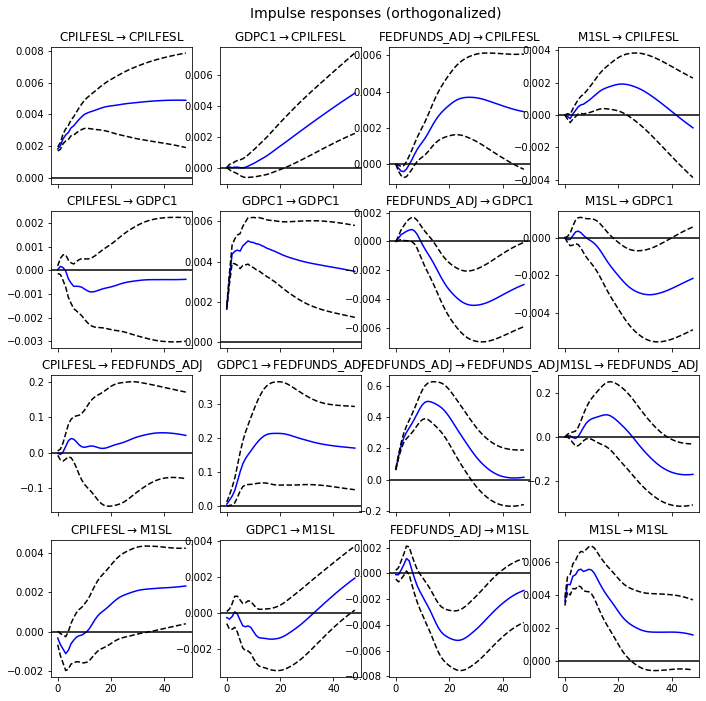

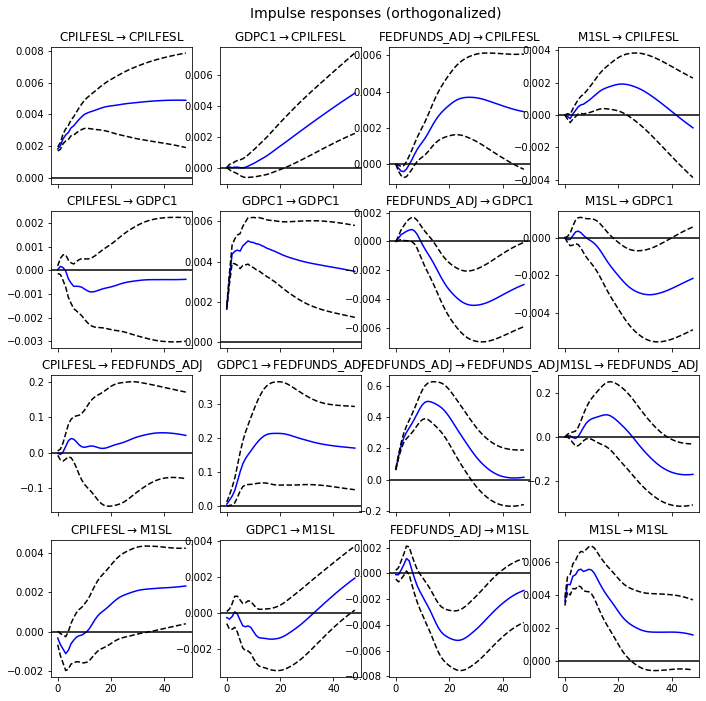

In [10]:
# Impulse Response
irf = result.irf(periods=48)
irf.plot(orth=True,signif=0.05)

In [11]:
# coefficient matrix of structural shock
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, May, 2021
Time:                     18:50:03
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -40.9135
Nobs:                     435.000    HQIC:                  -41.4805
Log likelihood:           6733.49    FPE:                6.68130e-19
AIC:                     -41.8503    Det(Omega_mle):     5.34302e-19
--------------------------------------------------------------------
Results for equation CPILFESL
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.018871         0.011909           -1.585           0.113
L1.CPILFESL             1.101037         0.048881           22.525           0.000
L1.GDPC1                0.029068         0.051755

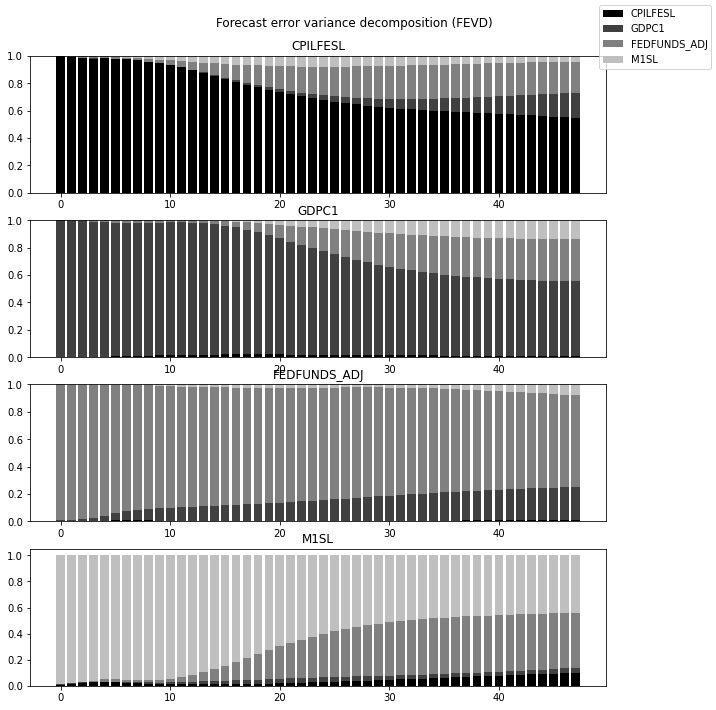

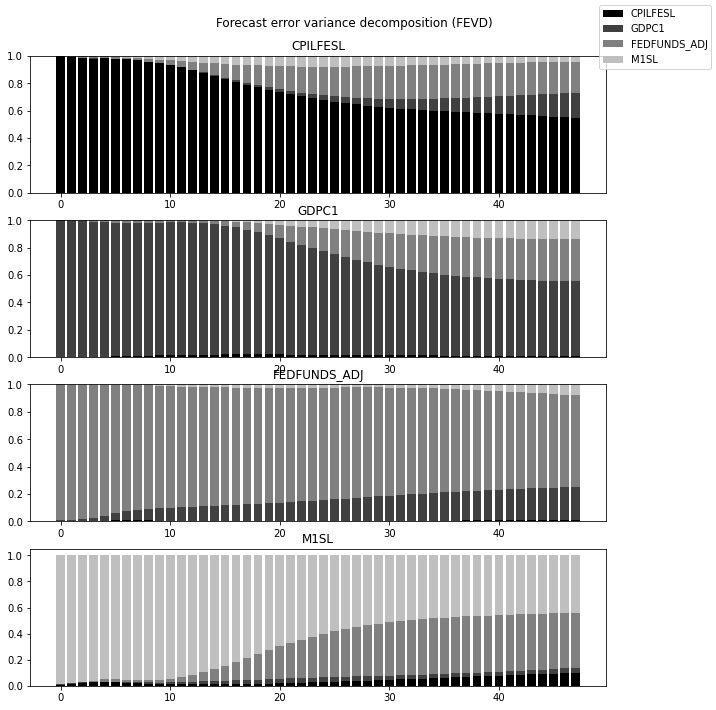

In [12]:
# (d) varience decompotision
fevd = result.fevd(48)
fevd.plot()